### load the data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import cufflinks as cf

In [2]:
cf.go_offline()

In [3]:
data = pd.read_csv('kaggle_survey_2022_responses.csv', low_memory=False)

In [4]:
data.head()

,Duration (in seconds),Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,...,Q44_3,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,"Are you currently a student? (high school, uni...",On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...
1,121,30-34,Man,India,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,462,30-34,Man,Algeria,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,293,18-21,Man,Egypt,Yes,Coursera,edX,NaN,DataCamp,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...",NaN,NaN,NaN,NaN,NaN
4,851,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,"Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums...",NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN


### data EDA part 2

### Education

Text(0.5, 1.0, 'Current Educational Level of Kaggle Users')

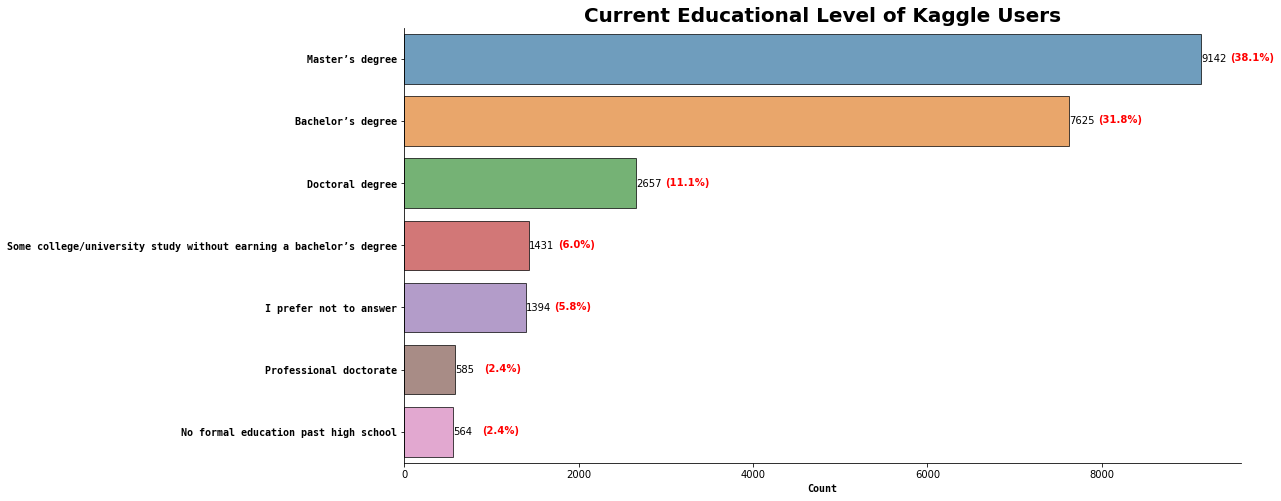

In [5]:
sns.barplot(data['Q8'][1:].value_counts().reset_index(), x='Q8', y='index', edgecolor='black', alpha=0.7)
plt.ylabel('')
plt.xlabel('Count', fontname = 'monospace', weight='semibold')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for i in ax.get_yticklabels():
    i.set_font('monospace')
    i.set_weight('semibold')
fig = plt.gcf()
fig.set_size_inches(15,8)
for i in ax.containers:
    plt.bar_label(i)
for p in ax.patches:
    pct = f'({100*p.get_width()/float(len(data)):0.1f}%)\n'
    ax.annotate(pct, (p.get_width()+330,p.get_y() + p.get_height()/1.29), weight='semibold', color='red')
plt.title('Current Educational Level of Kaggle Users', size=20, weight='semibold')

In [6]:
fig = px.pie(data['Q8'][1:].value_counts().reset_index(), values='Q8', names='index', labels={'index':'Education level', 'Q8':'Count'})
fig.update_traces(textinfo='label+percent')

### programming languages

In [7]:
df=data.loc[:,'Q12_1':'Q12_15'][1:]

In [8]:
def set_column_names(x):
    return df[x].unique()[1]

In [9]:
programming_language = df.count(axis=0).reset_index()

In [10]:
programming_language['programming_language']=programming_language['index'].apply(set_column_names)

In [11]:
programming_language = programming_language.drop('index', axis=1).set_index('programming_language').reset_index()

In [12]:
programming_language.columns=['programming_language', 'count']

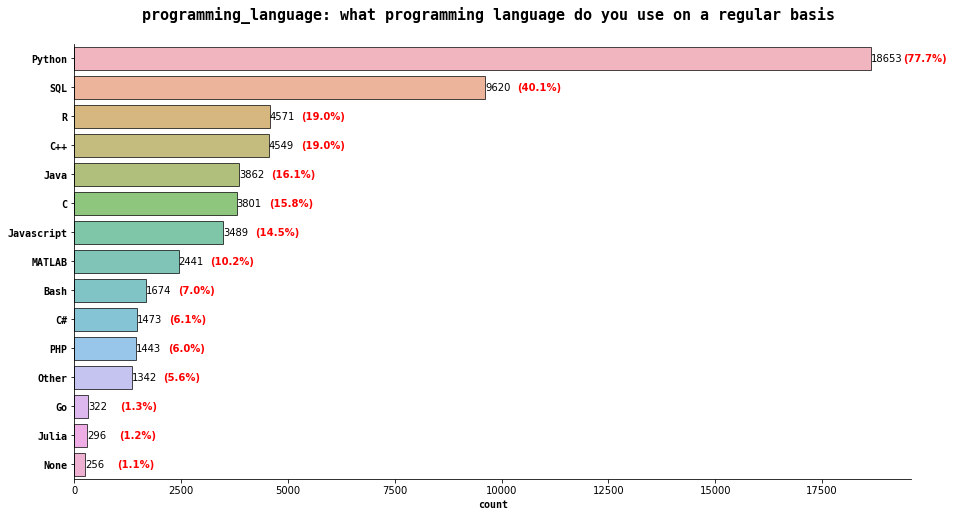

In [13]:
sns.barplot(programming_language.sort_values('count')[::-1], y='programming_language', x='count', edgecolor='black', alpha=0.7)
fig = plt.gcf()
ax = plt.gca()
plt.ylabel('')
fig.set_size_inches(15,8)
for p in ax.patches:
    pct = f'({100*p.get_width()/float(len(data)):0.1f}%)\n'
    ax.annotate(pct, (p.get_width()+750,p.get_y() + p.get_height()/0.89), weight='semibold', color='red')
for i in ax.containers:
    plt.bar_label(i)
ax.spines[['top', 'right']].set_visible(False)
for i in ax.get_yticklabels():
    i.set_font('monospace')
    i.set_weight('semibold')
plt.xlabel('count', weight='semibold', font='monospace')
plt.title('programming_language: what programming language do you use on a regular basis \n',weight='semibold', font='monospace',size=15 );

### Industry

In [44]:
industry = data['Q24'][1:].value_counts().reset_index()
industry.columns = ['industry', 'count']

In [90]:
industry_len = len(data[~data['Q24'].isnull()]['Q24'][1:])

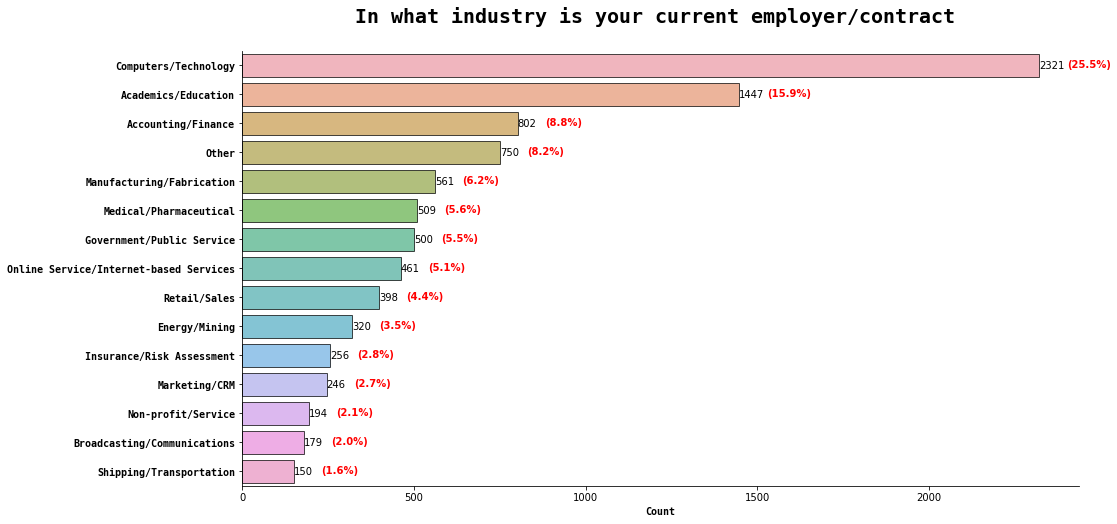

In [106]:
sns.barplot(data=industry, y='industry', x='count', edgecolor='black', alpha=0.7)
fig=plt.gcf()
fig.set_size_inches(15,8)
plt.ylabel('')
ax = plt.gca()
ax.spines[['top', 'right']].set_visible(False)
for i in ax.containers:
    plt.bar_label(i)
for p in ax.patches:
    pct = f'({100*p.get_width()/industry_len:0.1f}%)\n'
    ax.annotate(pct, (p.get_width()+80,p.get_y() + p.get_height()/0.9), weight='semibold', color='red')
for i in ax.get_yticklabels():
    i.set_font('monospace')
    i.set_weight('semibold')
plt.xlabel('Count', font='monospace', weight='semibold')
plt.title('In what industry is your current employer/contract \n', size=20, font='monospace', weight='semibold');

In [110]:
fig = px.pie(industry, values='count', names='industry')
fig.update_traces(textinfo='label+percent')
fig.show()

### ML algorithms

In [162]:
ML_algorithms = data.loc[:,'Q18_1':'Q18_14'][1:]

In [163]:
def set_column_names_algorithms(x):
    return ML_algorithms[x].unique()[1]

In [164]:
algorithms = ML_algorithms.count(axis=0).reset_index()
algorithms['algorithms'] = algorithms['index'].apply(set_column_names_algorithms)

In [168]:
algorithms = algorithms.drop('index', axis=1).set_index('algorithms').reset_index()
algorithms.columns = ['algorithms', 'count']

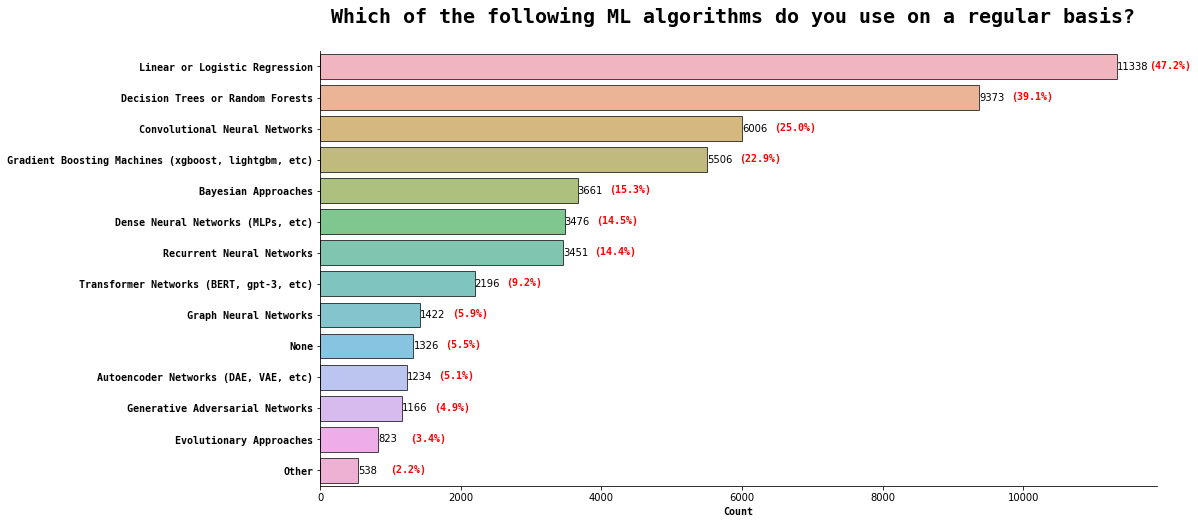

In [200]:
sns.barplot(algorithms.sort_values('count')[::-1], x='count', y='algorithms', edgecolor='black', alpha=0.7)
fig=plt.gcf()
fig.set_size_inches(15, 8)
ax = plt.gca()
ax.spines[['right', 'top']].set_visible(False)
for i in ax.get_yticklabels():
    i.set_font('monospace')
    i.set_weight('semibold')
for p in ax.patches:
    pct = f'({100*p.get_width()/len(data):0.1f}%)\n'
    ax.annotate(pct, (p.get_width()+450,p.get_y() + p.get_height()/0.95), font='monospace', weight='semibold', color='red')
for i in ax.containers:
    plt.bar_label(i)
plt.xlabel('Count', font='monospace', weight='semibold')
plt.ylabel('')
plt.title('Which of the following ML algorithms do you use on a regular basis? \n', font='monospace', weight='semibold', size=20);